In [1]:
from IPython.display import Image

# La Magia de la television
## Capitulo 3: Todo termina con un premio

## Parte 1: Los premios son toda una mentira

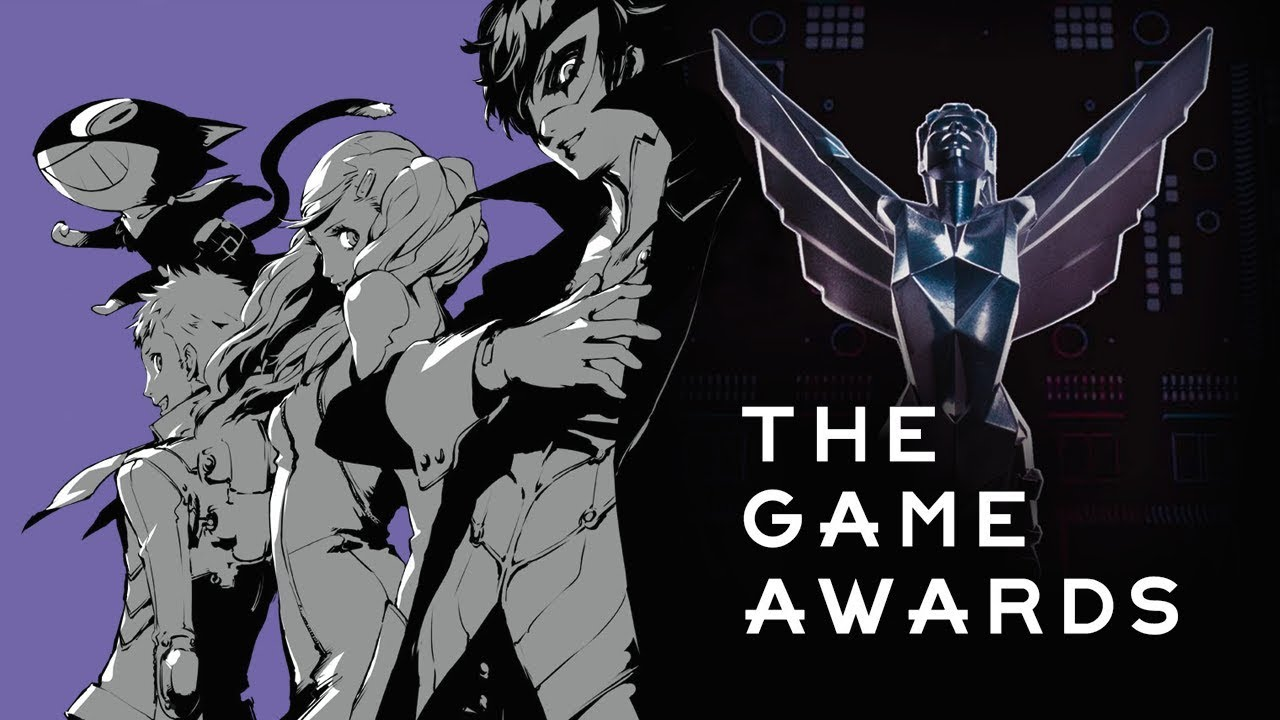

In [2]:
Image(filename='./clase-16-04_images/img1.jpg')

En la realidad, todos sabemos que los premios se eligen no en base a la realidad y los votos, sino en base a quien pone mas plata para comprarlos. Pero bueno, suponiendo que esto es asi, podriamos automatizar el proceso de eleccion de ganadores.

Vamos a encarar este problema diciendo que las nominaciones estan en una matriz, donde las columnas son categorias, las filas son las posiciones de nominacion y cada celda es una tupla de la forma (Nombre del nominado, puntaje segun los votos). Planteado de esta forma, el problema de encontrar los ganadores se transforma en encontrar el maximo de cada columna de dicha matriz.

Para hacer esto un poco mas realista, vamos a decir que las posiciones de nominacion sirven para desempatar en caso que dos o mas nominados tengan el mismo puntaje. Si no fueran nominados y fueran solo numeros, seria indistinto.

Supongamos que el proceso de nominacion ocurre de la forma:
 * Se parte de una matriz vacia
 * Hay una funcion a la que se le pasa la matriz y esta la llena con los nominados

In [3]:
PRIMER_NOMINADO = 0
SEGUNDO_NOMINADO = 1
TERCER_NOMINADO = 2
CUARTO_NOMINADO = 3

ANIME = 0
NOVELA_ARGENTINA = 1
NOVELA_KOREANA = 2

NOMBRE = 0
PUNTAJE = 1

mis_nominados = [
    [None]*3,
    [None]*3,
    [None]*3,
    [None]*3,
]

mis_nominados

[[None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None]]

In [4]:
def nominar(nominados):
    nominados[PRIMER_NOMINADO][ANIME] = ("Persona 5: The Animation",10)
    nominados[SEGUNDO_NOMINADO][ANIME] = ("Steins;Gate 0",9.9)
    nominados[TERCER_NOMINADO][ANIME] = ("Tokyo Ghoul: re",8)
    nominados[CUARTO_NOMINADO][ANIME] = ("Magical Girl Site", 8)
    
    nominados[PRIMER_NOMINADO][NOVELA_ARGENTINA] = ("El Sultan",0)
    nominados[SEGUNDO_NOMINADO][NOVELA_ARGENTINA] = ("Simona",5)
    nominados[TERCER_NOMINADO][NOVELA_ARGENTINA] = ("Golpe al corazon", 2)
    nominados[CUARTO_NOMINADO][NOVELA_ARGENTINA] = ("Ojos que no ven", 4)
    
    nominados[PRIMER_NOMINADO][NOVELA_KOREANA] = ("Another Miss Oh",9)
    nominados[SEGUNDO_NOMINADO][NOVELA_KOREANA] = ("Beating Again",9.9)
    nominados[TERCER_NOMINADO][NOVELA_KOREANA] = ("Goodbye Mr Black",9.9)
    nominados[CUARTO_NOMINADO][NOVELA_KOREANA] = ("Nine Time Travels", 8)

mis_nominados

[[None, None, None],
 [None, None, None],
 [None, None, None],
 [None, None, None]]

In [5]:
nominar(mis_nominados)
mis_nominados

[[('Persona 5: The Animation', 10), ('El Sultan', 0), ('Another Miss Oh', 9)],
 [('Steins;Gate 0', 9.9), ('Simona', 5), ('Beating Again', 9.9)],
 [('Tokyo Ghoul: re', 8), ('Golpe al corazon', 2), ('Goodbye Mr Black', 9.9)],
 [('Magical Girl Site', 8), ('Ojos que no ven', 4), ('Nine Time Travels', 8)]]

Para ver como funciona esto paso a paso en la memoria, podemos verlo directamente aqui: [https://goo.gl/1UpYhM](https://goo.gl/1UpYhM)

Ahora si, teniendo la matriz, podemos programar la funcion:

In [6]:
def obtener_ganadores(nominados):
    """Recibe una matriz como lista de listas donde cada fila es un orden de nominacion y cada columna una categoria.
        Devuelve una lista con los ganadores de cada categoria (maximo puntaje de cada columna)"""
    maximos= nominados[0][:]
    
    for fila in nominados:
        for categoria,nominado in enumerate(fila):
            _,puntaje = nominado
            _,puntaje_anterior = maximos[categoria]
            
            if puntaje > puntaje_anterior:
                maximos[categoria] = nominado
    
    return maximos

obtener_ganadores(mis_nominados)

[('Persona 5: The Animation', 10), ('Simona', 5), ('Beating Again', 9.9)]

Es mucho muy importante recordar que **HAY QUE HACER UNA COPIA DE LA LISTA PARA TRABAJAR**. En los siguientes enlaces se puede ver como se comporta todo si hago una copia o si no (y rompo todo)

[Con copia](http://pythontutor.com/visualize.html#code=PRIMER_NOMINADO%20%3D%200%0ASEGUNDO_NOMINADO%20%3D%201%0ATERCER_NOMINADO%20%3D%202%0ACUARTO_NOMINADO%20%3D%203%0A%0AANIME%20%3D%200%0ANOVELA_ARGENTINA%20%3D%201%0ANOVELA_KOREANA%20%3D%202%0A%0ANOMBRE%20%3D%200%0APUNTAJE%20%3D%201%0A%0Amis_nominados%20%3D%20%5B%0A%20%20%20%20%5BNone%5D*3,%0A%20%20%20%20%5BNone%5D*3,%0A%20%20%20%20%5BNone%5D*3,%0A%20%20%20%20%5BNone%5D*3,%0A%5D%0A%0Amis_nominados%0A%0Adef%20nominar%28nominados%29%3A%0A%20%20%20%20nominados%5BPRIMER_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Persona%205%3A%20The%20Animation%22,10%29%0A%20%20%20%20nominados%5BSEGUNDO_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Steins%3BGate%200%22,9.9%29%0A%20%20%20%20nominados%5BTERCER_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Tokyo%20Ghoul%3A%20re%22,8%29%0A%20%20%20%20nominados%5BCUARTO_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Magical%20Girl%20Site%22,%208%29%0A%20%20%20%20%0A%20%20%20%20nominados%5BPRIMER_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22El%20Sultan%22,0%29%0A%20%20%20%20nominados%5BSEGUNDO_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22Simona%22,5%29%0A%20%20%20%20nominados%5BTERCER_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22Golpe%20al%20corazon%22,%202%29%0A%20%20%20%20nominados%5BCUARTO_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22Ojos%20que%20no%20ven%22,%204%29%0A%20%20%20%20%0A%20%20%20%20nominados%5BPRIMER_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Another%20Miss%20Oh%22,9%29%0A%20%20%20%20nominados%5BSEGUNDO_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Beating%20Again%22,9.9%29%0A%20%20%20%20nominados%5BTERCER_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Goodbye%20Mr%20Black%22,9.5%29%0A%20%20%20%20nominados%5BCUARTO_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Nine%20Time%20Travels%22,%208%29%0A%0Amis_nominados%0A%0Anominar%28mis_nominados%29%0Amis_nominados%0A%0Adef%20obtener_ganadores%28nominados%29%3A%0A%20%20%20%20%22%22%22Recibe%20una%20matriz%20como%20lista%20de%20listas%20donde%20cada%20fila%20es%20un%20orden%20de%20nominacion%20y%20cada%20columna%20una%20categoria.%0A%20%20%20%20%20%20%20%20Devuelve%20una%20lista%20con%20los%20ganadores%20de%20cada%20categoria%20%28maximo%20puntaje%20de%20cada%20columna%29%22%22%22%0A%20%20%20%20maximos%3D%20nominados%5B0%5D%5B%3A%5D%0A%20%20%20%20%0A%20%20%20%20for%20fila%20in%20nominados%3A%0A%20%20%20%20%20%20%20%20for%20categoria,nominado%20in%20enumerate%28fila%29%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20_,puntaje%20%3D%20nominado%0A%20%20%20%20%20%20%20%20%20%20%20%20_,puntaje_anterior%20%3D%20maximos%5Bcategoria%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20puntaje%20%3E%20puntaje_anterior%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20maximos%5Bcategoria%5D%20%3D%20nominado%0A%20%20%20%20%0A%20%20%20%20return%20maximos%0A%20%20%20%20%0Aobtener_ganadores%28mis_nominados%29&cumulative=false&curInstr=33&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

[Sin copia](http://pythontutor.com/visualize.html#code=PRIMER_NOMINADO%20%3D%200%0ASEGUNDO_NOMINADO%20%3D%201%0ATERCER_NOMINADO%20%3D%202%0ACUARTO_NOMINADO%20%3D%203%0A%0AANIME%20%3D%200%0ANOVELA_ARGENTINA%20%3D%201%0ANOVELA_KOREANA%20%3D%202%0A%0ANOMBRE%20%3D%200%0APUNTAJE%20%3D%201%0A%0Amis_nominados%20%3D%20%5B%0A%20%20%20%20%5BNone%5D*3,%0A%20%20%20%20%5BNone%5D*3,%0A%20%20%20%20%5BNone%5D*3,%0A%20%20%20%20%5BNone%5D*3,%0A%5D%0A%0Amis_nominados%0A%0Adef%20nominar%28nominados%29%3A%0A%20%20%20%20nominados%5BPRIMER_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Persona%205%3A%20The%20Animation%22,10%29%0A%20%20%20%20nominados%5BSEGUNDO_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Steins%3BGate%200%22,9.9%29%0A%20%20%20%20nominados%5BTERCER_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Tokyo%20Ghoul%3A%20re%22,8%29%0A%20%20%20%20nominados%5BCUARTO_NOMINADO%5D%5BANIME%5D%20%3D%20%28%22Magical%20Girl%20Site%22,%208%29%0A%20%20%20%20%0A%20%20%20%20nominados%5BPRIMER_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22El%20Sultan%22,0%29%0A%20%20%20%20nominados%5BSEGUNDO_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22Simona%22,5%29%0A%20%20%20%20nominados%5BTERCER_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22Golpe%20al%20corazon%22,%202%29%0A%20%20%20%20nominados%5BCUARTO_NOMINADO%5D%5BNOVELA_ARGENTINA%5D%20%3D%20%28%22Ojos%20que%20no%20ven%22,%204%29%0A%20%20%20%20%0A%20%20%20%20nominados%5BPRIMER_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Another%20Miss%20Oh%22,9%29%0A%20%20%20%20nominados%5BSEGUNDO_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Beating%20Again%22,9.9%29%0A%20%20%20%20nominados%5BTERCER_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Goodbye%20Mr%20Black%22,9.5%29%0A%20%20%20%20nominados%5BCUARTO_NOMINADO%5D%5BNOVELA_KOREANA%5D%20%3D%20%28%22Nine%20Time%20Travels%22,%208%29%0A%0Amis_nominados%0A%0Anominar%28mis_nominados%29%0Amis_nominados%0A%0Adef%20obtener_ganadores%28nominados%29%3A%0A%20%20%20%20%22%22%22Recibe%20una%20matriz%20como%20lista%20de%20listas%20donde%20cada%20fila%20es%20un%20orden%20de%20nominacion%20y%20cada%20columna%20una%20categoria.%0A%20%20%20%20%20%20%20%20Devuelve%20una%20lista%20con%20los%20ganadores%20de%20cada%20categoria%20%28maximo%20puntaje%20de%20cada%20columna%29%22%22%22%0A%20%20%20%20maximos%3D%20nominados%20%5B0%5D%0A%20%20%20%20%0A%20%20%20%20for%20fila%20in%20nominados%3A%0A%20%20%20%20%20%20%20%20for%20categoria,nominado%20in%20enumerate%28fila%29%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20_,puntaje%20%3D%20nominado%0A%20%20%20%20%20%20%20%20%20%20%20%20_,puntaje_anterior%20%3D%20maximos%5Bcategoria%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20puntaje%20%3E%20puntaje_anterior%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20maximos%5Bcategoria%5D%20%3D%20nominado%0A%20%20%20%20%0A%20%20%20%20return%20maximos%0A%20%20%20%20%0Aobtener_ganadores%28mis_nominados%29&cumulative=false&curInstr=33&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

## Parte 2: Ya te dije que yo si estoy en la lista
### Titulo alternativo: [I Will Always Love You](https://youtu.be/3JWTaaS7LdU)

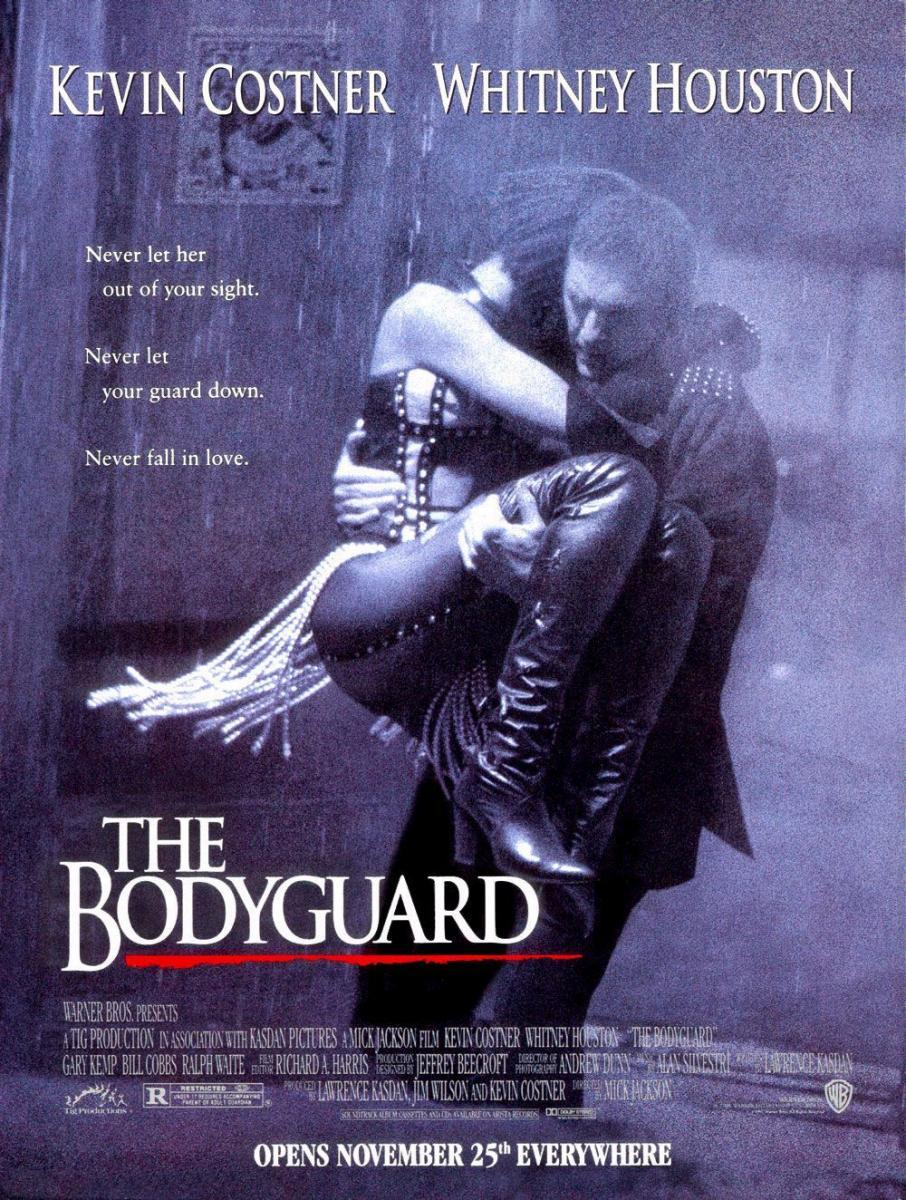

In [7]:
Image(filename='./clase-16-04_images/img2.jpg')

Los patovicas suelen ser una version menos glamorosa de Kevin Costner en [El Guardaespaldas](https://youtu.be/3JWTaaS7LdU) (si, puse otra vez el link por si no lo vieron en el titulo), y tienen como tarea encargarse de controlar quien entra y quien no a, por ejemplo, una entrega de premios.

De alguna forma podemos simular esto haciendo una funcion que dadas:
 * Una lista de personas que quieren entrar 
 * Una lista de personas que pueden entrar
 
devuelva una lista con las personas que efectivamente entraron. Es obvio que alguien no puede entrar 2 veces, asi que la lista de resultados no deberia tener repetidos. 

Ya que estamos, hagamoslo general para dos secuencias cualesquiera, total, no vamos a usar nada que no pueda hacer una secuencia

In [8]:
def interseccion(secuencia_a,secuencia_b):
    """Devuelve una lista con los elementos de la secuencia a que se encuentran en la secuencia b, sin repetir"""
    resultado = []
    for elemento in secuencia_a:
        if elemento not in secuencia_b:
            continue

        if elemento not in resultado:
            resultado.append(elemento)
            
    return resultado

interseccion([1,2,3],[2,2,2,3])

[2, 3]

Bueno, si, whatever, es obvio que la funcion lo que hace a fin de cuentas es la interseccion entre 2 conjuntos (para mas informacion, prestar mas atencion en algebra de conjuntos en el CBC). Si bien el ejercicio es bastante trivial en algun punto, recuerden lo que discutimos sobre el hecho de que sean secuencias a secas:

In [9]:
interseccion(["Hola","Chau"] , "Hola como estas")

['Hola']

Esto se debe a que al hacer `in` de una cadena dentro de otra, Python asume que lo que queremos hacer es buscar subcadenas (Como hicimos en la clase del 09/04). Entender este comportamiento es bastante intuitivo si se lo piensa desde el lado de Python como: Las cadenas solo tienen elementos que sean caracteres, si me esta pasando algo que es trivialmente obvio que no esta (duh), supongo que lo que quiere es buscar substrings (o no sabe lo que quiere y ya no es mi problema). En las listas y tuplas como pueden guardar cualquier cosa no vale un razonamiento similar.

En este caso estaria bueno poner en la documentacion que las dos secuencias deben ser del mismo tipo, y asi nos ahorramos comportamientos extraños.

### Nota al final de la clase

Los ejercicios realizados en esta clase, corresponden a los ejercicios que se pueden encontrar en los ejercicios enviados para resolver en el taller.